In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
import statsmodels.api as sm


In [27]:
data= pd.read_csv("inputData_AUDCAD_20120426.csv")

data['Date']= pd.to_datetime(data["Date"], format= "%Y%m%d")
data.set_index("Date", inplace= True)
price= data['Close']

Text(0.5, 1.0, 'USD/CAD daily closing price')

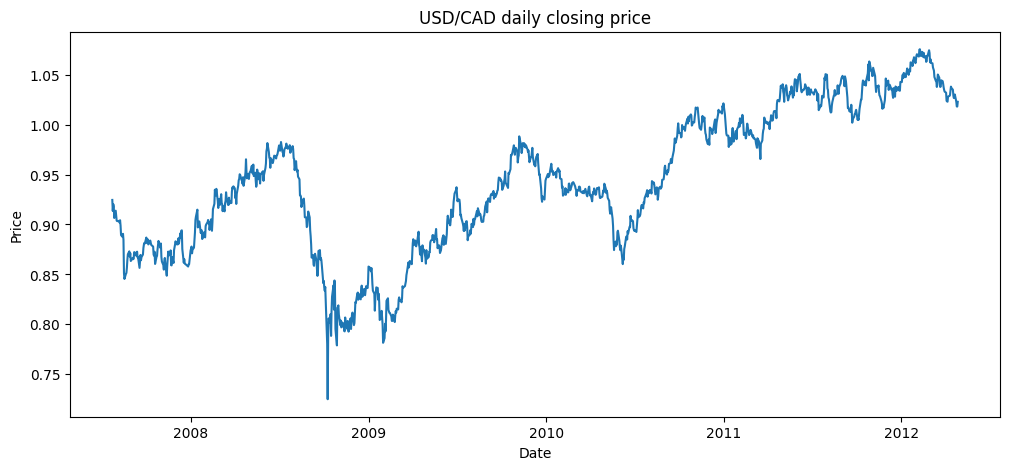

In [32]:
plt.figure(figsize=(12,5))
plt.plot(price)
plt.xlabel("Date")
plt.ylabel("Price")
plt.title("USD/CAD daily closing price")

In [33]:
log_prices= np.log(price)


In [41]:
adf_result= adfuller(log_prices, maxlag=1, regression='c')
test_stat= adf_result[0]
p_value= adf_result[1]
critical_value= adf_result[4]

print("The test statistic is", test_stat)
print("the p value is", p_value)
print("the critical value is", critical_value['10%'])

The test statistic is -1.5416857197505023
the p value is 0.5127985567768013
the critical value is -2.568017509711682


In [42]:
y=log_prices
delta_y =y.diff().dropna()
y_lag= y.shift(1).dropna()
delta_y= delta_y.loc[y_lag.index]


In [45]:
X= sm.add_constant(y_lag)
model= sm.OLS(delta_y, X).fit()

lambda_hat= model.params[1]
print("lambda", lambda_hat)


lambda -0.004975120916009261


/tmp/ipython-input-3809893643.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  lambda_hat= model.params[1]


In [46]:
half_life = np.log(2) / (-lambda_hat)
print("Half-life (days):", half_life)

Half-life (days): 139.32268024471367
